# Dataset
    Tahap pertama yang dilakukan untuk mengimplementasikan metode adalah mempersiapkan data terlebih dahulu

### 1. Membaca file json

In [69]:
import json

with open("dataset/guci_intent.json") as guci_dataset:
  dataset = json.load(guci_dataset)

print(dataset)

{'intents': [{'intent': 'Basic1', 'text': ["Assalamu'alaikum", 'mikum', 'ass', "assalamu'alaikum wr.wb", '.'], 'responses': ["wa'alaikumusallam wr. Wb, Apakah ada yang bisa kami bantu?tolong ketikan apa yang anda hendak kunjungi di objek wisata guci "], 'extension': {'function': '', 'entities': False, 'responses': []}, 'context': {'in': '', 'out': 'pembuka', 'clear': False}, 'entityType': 'NA', 'entities': []}, {'intent': 'Basic2', 'text': ['tiket masuk guci', 'HTM', 'tiket', 'biaya'], 'responses': ['harga tiket masuk guci pada hari biasa sebesar RP. 10.000, jika hari libur harga tiket masuk guci sebesar Rp. 15.000'], 'extension': {'function': '', 'entities': False, 'responses': []}, 'context': {'in': '', 'out': 'harga', 'clear': False}, 'entityType': 'NA', 'entities': []}, {'intent': 'Basic3', 'text': ['rekomendasi'], 'responses': ['rekomendasi apa yang kamu inginkan? Apakah kamu mau mandi air panas atau nongkrong atau menginap di hotel'], 'extension': {'function': '', 'entities': Fal

### 2. Memecah data dari json ke variabel

In [70]:
def processing_json_dataset(dataset):
  tags = []
  inputs = []
  responses={}
  for intent in dataset['intents']:
    responses[intent['intent']]=intent['responses']
    for lines in intent['text']:
      inputs.append(lines)
      tags.append(intent['intent'])
  return [tags, inputs, responses]

[tags, inputs, responses] = processing_json_dataset(dataset)
print(f'tags : {tags}')
print(f'inputs : {inputs}')
print(f'responses : {responses}')

tags : ['Basic1', 'Basic1', 'Basic1', 'Basic1', 'Basic1', 'Basic2', 'Basic2', 'Basic2', 'Basic2', 'Basic3', 'Basic4', 'Basic5', 'Basic5', 'Basic5', 'Basic6', 'Basic7', 'Basic8', 'Basic9', 'Basic9', 'Basic9', 'Basic9', 'Basic9', 'Basic9', 'lokasi1', 'lokasi1', 'lokasi1', 'lokasi1', 'lokasi2', 'lokasi2', 'lokasi2', 'lokasi2', 'lokasi3', 'lokasi3', 'lokasi3', 'lokasi4', 'lokasi4', 'lokasi4', 'lokasi5', 'lokasi5', 'lokasi5', 'lokasi6', 'lokasi6', 'lokasi6', 'lokasi6', 'lokasi7', 'lokasi7', 'lokasi7', 'lokasi8', 'lokasi8', 'lokasi8', 'lokasi9', 'lokasi9', 'lokasi9', 'lokasi10', 'lokasi10', 'lokasi10', 'lokasi11', 'lokasi11', 'lokasi11', 'lokasi11', 'lokasi11', 'lokasi12', 'lokasi12', 'lokasi12', 'lokasi12', 'lokasi13', 'lokasi13', 'lokasi13', 'lokasi13', 'lokasi14', 'lokasi14', 'lokasi14', 'lokasi14', 'lokasi15', 'lokasi15', 'lokasi15', 'lokasi16', 'lokasi16', 'lokasi17', 'lokasi17', 'lokasi17', 'lokasi17', 'lokasi18', 'lokasi18', 'lokasi19', 'lokasi19', 'lokasi19', 'lokasi19', 'lokasi20', 

### 3. Memasukkan data ke dalam pandas DataFrame

In [71]:
import pandas as pd

dataset = pd.DataFrame({"inputs":inputs, "tags":tags})
dataset

,inputs,tags
0,Assalamu'alaikum,Basic1
1,mikum,Basic1
2,ass,Basic1
3,assalamu'alaikum wr.wb,Basic1
4,.,Basic1
...,...,...
111,gulala guci,lokasi26
112,gulala,lokasi26
113,hotel gran dian?,lokasi27
114,gran dian guci?,lokasi27


### 4. Mengacak data

In [72]:
dataset = dataset.sample(frac=1)
dataset

,inputs,tags
55,rindu alam,lokasi10
31,hotel sun q ta ?,lokasi3
6,HTM,Basic2
2,ass,Basic1
103,grand mega,lokasi24
...,...,...
107,onsen guci,lokasi25
4,.,Basic1
73,hotel the geong?,lokasi15
91,kafe,lokasi20


# Preprocessing
    Menyiapkan data agar dapat diproses oleh algoritma lebih baik, langka-langkahnya antara lain :

### 1. Tokenisasi
    Memecah teks menjadi unit-unit lebih kecil, dalam hal ini memisahkan setiap karakter termasuk spasi dan tanda baca

In [73]:
dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs for ltrs in sequence])
dataset

,inputs,tags
55,"[r, i, n, d, u, , a, l, a, m]",lokasi10
31,"[h, o, t, e, l, , , s, u, n, , q, , t, a, ...",lokasi3
6,"[H, T, M]",Basic2
2,"[a, s, s]",Basic1
103,"[g, r, a, n, d, , m, e, g, a]",lokasi24
...,...,...
107,"[o, n, s, e, n, , g, u, c, i]",lokasi25
4,[.],Basic1
73,"[h, o, t, e, l, , t, h, e, , g, e, o, n, g, ?]",lokasi15
91,"[k, a, f, e]",lokasi20


### 2. Cleaning
    Membersihkan simbol-simbol seperti tanda baca, tag-tag html dll

In [74]:
import string

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs for ltrs in sequence if ltrs not in string.punctuation])
dataset

,inputs,tags
55,"[r, i, n, d, u, , a, l, a, m]",lokasi10
31,"[h, o, t, e, l, , , s, u, n, , q, , t, a, ]",lokasi3
6,"[H, T, M]",Basic2
2,"[a, s, s]",Basic1
103,"[g, r, a, n, d, , m, e, g, a]",lokasi24
...,...,...
107,"[o, n, s, e, n, , g, u, c, i]",lokasi25
4,[],Basic1
73,"[h, o, t, e, l, , t, h, e, , g, e, o, n, g]",lokasi15
91,"[k, a, f, e]",lokasi20


### 3. Case Folding
    Mengubah case semua huruf menjadi huruf kecil

In [75]:

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs.lower() for ltrs in sequence])
dataset

,inputs,tags
55,"[r, i, n, d, u, , a, l, a, m]",lokasi10
31,"[h, o, t, e, l, , , s, u, n, , q, , t, a, ]",lokasi3
6,"[h, t, m]",Basic2
2,"[a, s, s]",Basic1
103,"[g, r, a, n, d, , m, e, g, a]",lokasi24
...,...,...
107,"[o, n, s, e, n, , g, u, c, i]",lokasi25
4,[],Basic1
73,"[h, o, t, e, l, , t, h, e, , g, e, o, n, g]",lokasi15
91,"[k, a, f, e]",lokasi20


    Setelah data input sudah dibersihkan melalui beberapa proses preprocessing, selanjutnya susunan kata nya akan dikembalikan seperti semula namun dalam keadaan sudah bersih

In [76]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))
dataset

,inputs,tags
55,rindu alam,lokasi10
31,hotel sun q ta,lokasi3
6,htm,Basic2
2,ass,Basic1
103,grand mega,lokasi24
...,...,...
107,onsen guci,lokasi25
4,,Basic1
73,hotel the geong,lokasi15
91,kafe,lokasi20


# Transformasi
    Mentransformasikan huruf menjadi angka sehingga dapat diproses lebih baik oleh model, dalam hal ini menggunakan Tokenizer yang terdapat pada keras didalam library tensorflow untuk data input, dan LabelEncoder yang terdapat pada library Sklearn untuk data target / kelas / intent

### 1. Transformasi input

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
print(tokenizer.word_index)

{'guci': 1, 'hotel': 2, 'pemandian': 3, 'penginapan': 4, 'cafe': 5, 'alam': 6, 'wisata': 7, 'grand': 8, 'gulala': 9, 'onsen': 10, 'air': 11, 'barokah': 12, 'rindu': 13, 'ta': 14, 'mega': 15, 'kampung': 16, 'salma': 17, 'water': 18, 'boom': 19, 'di': 20, 'fyp': 21, 'ashafana': 22, 'gung': 23, 'kencana': 24, 'panas': 25, 'rawamba': 26, 'duta': 27, 'forest': 28, 'sabda': 29, 'spot': 30, 'foto': 31, 'the': 32, 'dian': 33, 'sun': 34, 'q': 35, 'tiket': 36, 'assalamualaikum': 37, 'cod': 38, 'tempat': 39, 'bagaimana': 40, 'rekomendasi': 41, 'serwiti': 42, 'guciku': 43, 'joglo': 44, 'ageng': 45, 'gran': 46, 'kafe': 47, 'geong': 48, 'htm': 49, 'ass': 50, 'masuk': 51, 'prosotan': 52, 'warna': 53, 'warni': 54, 'golden': 55, 'park': 56, 'pinusan': 57, 'gubug': 58, 'selter': 59, 'biaya': 60, 'sudah': 61, 'azana': 62, 'bagus': 63, 'buat': 64, 'konten': 65, 'kabarmu': 66, 'tiktok': 67, 'jembatan': 68, 'kaca': 69, 'termewah': 70, 'ig': 71, 'sunq': 72, 'gbugs': 73, 'shelter': 74, 'terima': 75, 'kasih': 

In [78]:
features = pad_sequences(train)
print(train)

[[13, 6], [2, 34, 35, 14], [49], [50], [8, 15], [36, 51, 1], [2, 16, 1], [52, 53, 54], [9], [17], [37], [2, 55, 56], [5, 38], [3, 57], [58, 59], [60], [18, 19], [7, 13, 6], [4, 34, 35, 14], [61], [2, 9, 62], [39, 63, 64, 65, 20, 1], [16, 1], [40, 66], [21, 67, 1], [68, 69, 1], [2, 70, 20, 1], [3, 1, 22], [21, 71], [5, 17, 1], [2, 1, 23], [18, 19, 72, 14], [3, 10], [4, 1, 24], [41, 3, 11, 25], [5, 73, 74], [75, 76], [40, 77, 78], [3, 11, 25], [4, 16, 1], [42, 1], [21], [2, 26], [4, 27, 7], [37, 79], [80], [81, 82, 12], [1, 28], [4, 1, 23], [1, 24], [2, 43], [3, 13, 6], [4, 10, 1], [29, 6], [11, 83, 1], [39, 84, 85], [86, 87], [30, 31, 1], [88, 89, 90], [2, 91, 92], [2, 32, 10], [2, 44, 45], [2, 17], [2, 1, 28], [3, 11, 25, 1], [93], [94, 12, 1], [12, 1], [2, 1, 22], [8, 33], [44, 45], [2, 27, 7], [1, 22], [95], [27, 7, 1], [41], [3, 1, 28], [5, 9], [4, 26], [26], [96, 97, 98], [46, 33, 1], [4, 29, 6], [38, 1], [8, 15, 1], [2, 1, 24], [47, 1], [99, 42], [100], [30, 31, 1], [1, 23], [2, 4

In [79]:
print(features)

[[  0   0   0   0  13   6]
 [  0   0   2  34  35  14]
 [  0   0   0   0   0  49]
 [  0   0   0   0   0  50]
 [  0   0   0   0   8  15]
 [  0   0   0  36  51   1]
 [  0   0   0   2  16   1]
 [  0   0   0  52  53  54]
 [  0   0   0   0   0   9]
 [  0   0   0   0   0  17]
 [  0   0   0   0   0  37]
 [  0   0   0   2  55  56]
 [  0   0   0   0   5  38]
 [  0   0   0   0   3  57]
 [  0   0   0   0  58  59]
 [  0   0   0   0   0  60]
 [  0   0   0   0  18  19]
 [  0   0   0   7  13   6]
 [  0   0   4  34  35  14]
 [  0   0   0   0   0  61]
 [  0   0   0   2   9  62]
 [ 39  63  64  65  20   1]
 [  0   0   0   0  16   1]
 [  0   0   0   0  40  66]
 [  0   0   0  21  67   1]
 [  0   0   0  68  69   1]
 [  0   0   2  70  20   1]
 [  0   0   0   3   1  22]
 [  0   0   0   0  21  71]
 [  0   0   0   5  17   1]
 [  0   0   0   2   1  23]
 [  0   0  18  19  72  14]
 [  0   0   0   0   3  10]
 [  0   0   0   4   1  24]
 [  0   0  41   3  11  25]
 [  0   0   0   5  73  74]
 [  0   0   0   0  75  76]
 

### 2. Transformasi Target

In [80]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])
for i in range(len(le.classes_)):
    print(f'{i} : {le.classes_[i]}')
print(labels)
np.save('output/classes.npy', le.classes_)

0 : Basic1
1 : Basic2
2 : Basic3
3 : Basic4
4 : Basic5
5 : Basic6
6 : Basic7
7 : Basic8
8 : Basic9
9 : lokasi1
10 : lokasi10
11 : lokasi11
12 : lokasi12
13 : lokasi13
14 : lokasi14
15 : lokasi15
16 : lokasi16
17 : lokasi17
18 : lokasi18
19 : lokasi19
20 : lokasi2
21 : lokasi20
22 : lokasi21
23 : lokasi22
24 : lokasi23
25 : lokasi24
26 : lokasi25
27 : lokasi26
28 : lokasi27
29 : lokasi3
30 : lokasi4
31 : lokasi5
32 : lokasi6
33 : lokasi7
34 : lokasi8
35 : lokasi9
[10 29  1  0 25  1 17 13 27 35  0 13 21 11 19  1 33 10 29  8 27 13 17  4
 20 12 20 31 12 35 34 29 26 23 32 19  8  4 32 17 14 26 24 30  0  7  9 11
 34 23 33 10 26 22 14 19  4 15  6 12 26 20 35 11 32  8  9  9 31 28 20 30
 31  5 30  2 11 27 24 24 16 28 22 21 25 23 19 14  8 13 34 28 17 18 15 11
  0  3 18  8 25 22 14 33 16  1  9 32 21 12  8 26  0 15 21 27]


In [81]:
input_shape = features.shape[1]
print(input_shape)
print(features.shape)

6
(116, 6)


In [82]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  113
output length:  36


# Pelatihan
    Pada tahap ini, akan di implementasikan metode yang telah di susun dengan data yang telah dibersihkan

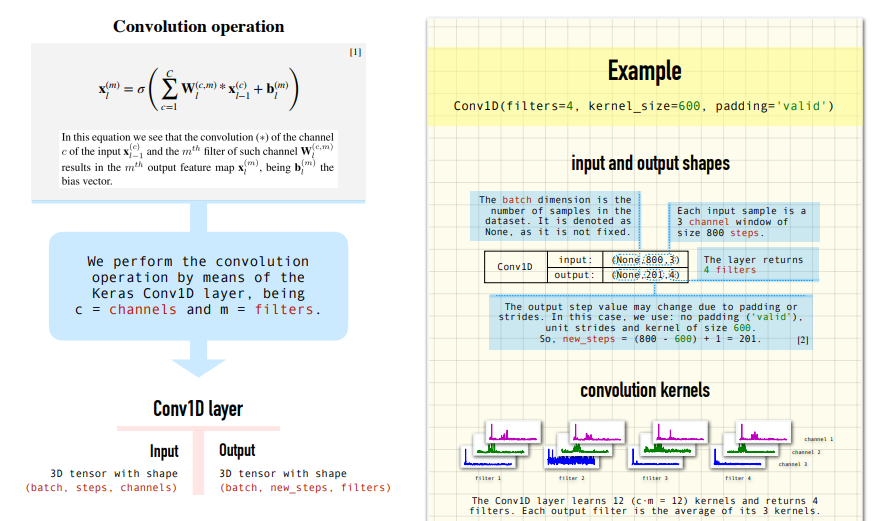

### 1. Inisialisasi Model

In [83]:
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D
import tensorflow as tf

m = Sequential()
m.add(Input(shape=(features.shape[1],))) # mendeklarasikan layer input dengan jumlah kata terbanyak di data set berdasarkan fitur pada data set setelah dilakukan tokenizer(mengubah kata menjadi angka)
m.add(Embedding(vocabulary + 1,50))  
m.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) # shadow layer (konfolusi)
m.add(Dropout(0.3))
m.add(LSTM(32, dropout=0.3,return_sequences=True)) # shadow layer lstm 
m.add(LSTM(16, dropout=0.3,return_sequences=False)) # shadow layer lstm
m.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
m.add(Dropout(0.6))
m.add(Dense(output_length, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

In [84]:
m.layers

### 2. Implementasi Word Embedding
    Word embeddings adalah proses konversi kata yang berupa karakter alphanumeric kedalam bentuk vector, ini di implementasikan bersama layer pada RNN

In [85]:
glove_dir = "glove/glove_50dim_wiki.id.case.text.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding="utf8")
for line in file_:
    arr = line.split()
    single_word = arr[0]
    w = np.asarray(arr[1:],dtype='float32')
    embeddings_index[single_word] = w
file_.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 370013 word vectors.


In [87]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words,50)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [88]:
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False

In [89]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [90]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 50)             5700      
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             8032      
                                                                 
 dropout_2 (Dropout)         (None, 2, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 2, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 128)               2176      
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [91]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 400, mode = 'min', restore_best_weights = True)

### 3. Menjalankan Pelatihan

In [92]:
history_training = m.fit(features,labels,epochs=2000, batch_size=64, callbacks=[ earlyStopping])

Epoch 1/2000
2/2 [==============================] - 29s 161ms/step - loss: 3.5883 - accuracy: 0.0431
Epoch 2/2000
2/2 [==============================] - 0s 83ms/step - loss: 3.5853 - accuracy: 0.0517
Epoch 3/2000
2/2 [==============================] - 0s 49ms/step - loss: 3.5836 - accuracy: 0.0603
Epoch 4/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.5836 - accuracy: 0.0517
Epoch 5/2000
2/2 [==============================] - 0s 68ms/step - loss: 3.5784 - accuracy: 0.0690
Epoch 6/2000
2/2 [==============================] - 0s 41ms/step - loss: 3.5790 - accuracy: 0.0690
Epoch 7/2000
2/2 [==============================] - 0s 179ms/step - loss: 3.5788 - accuracy: 0.0345
Epoch 8/2000
2/2 [==============================] - 0s 42ms/step - loss: 3.5796 - accuracy: 0.0862
Epoch 9/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.5790 - accuracy: 0.0517
Epoch 10/2000
2/2 [==============================] - 0s 50ms/step - loss: 3.5750 - accuracy: 0.0517
Epoch 

### 4. Visualisasi Hasil Pelatihan

In [93]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw_plot(data, type_data):
  # mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

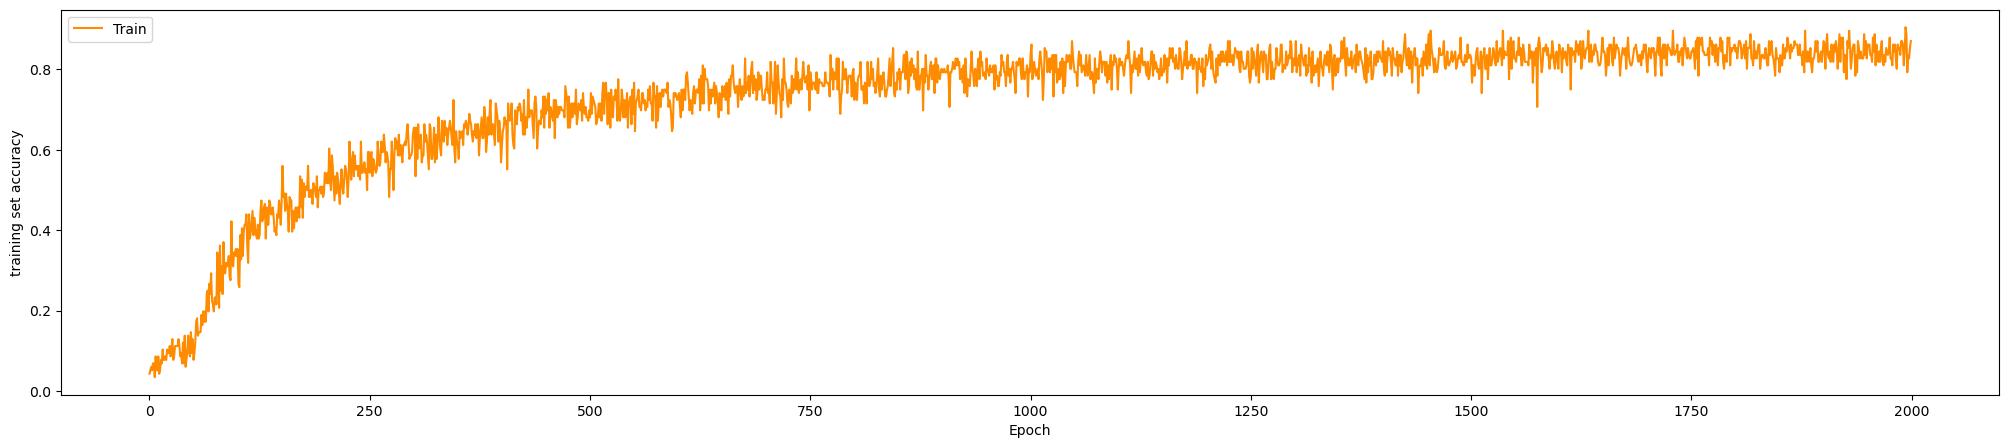

In [94]:
draw_plot(history_training.history['accuracy'],'training set accuracy' )

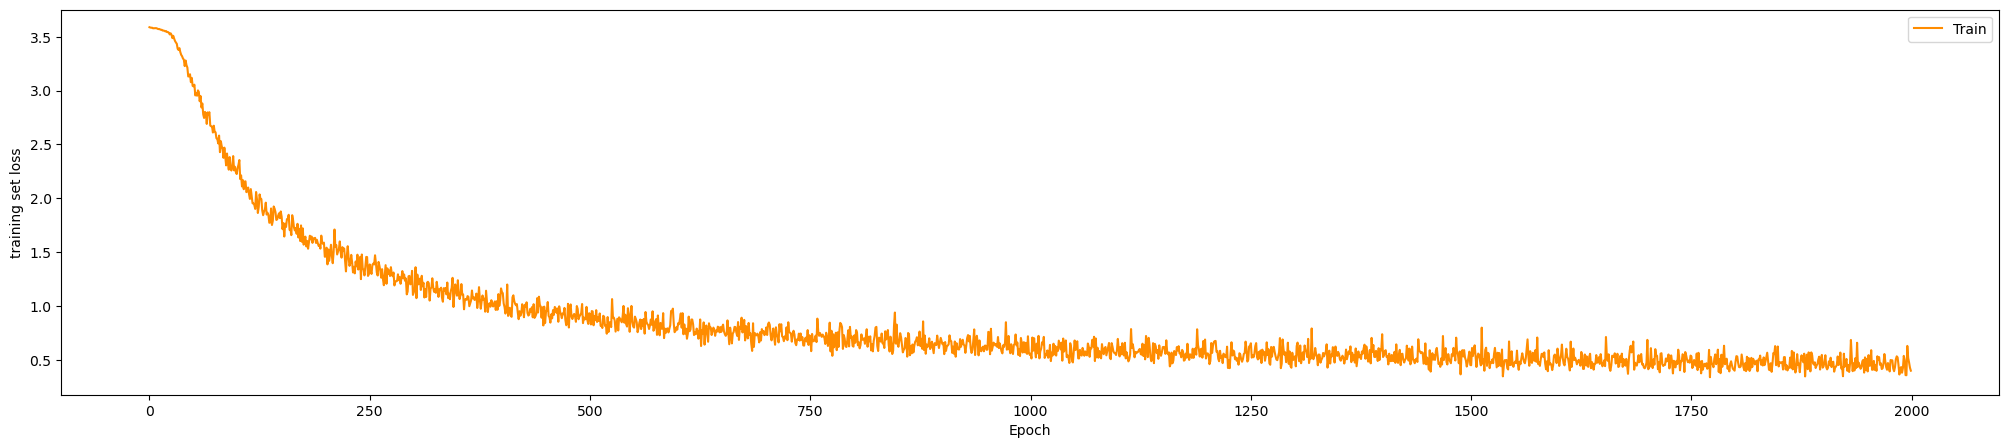

In [95]:
draw_plot(history_training.history['loss'],'training set loss' )

# Evaluasi

In [96]:
m.evaluate(features, labels, batch_size = 64)

2/2 [==============================] - 9s 16ms/step - loss: 0.2667 - accuracy: 0.8966


[0.2666667401790619, 0.8965517282485962]

# Simpan Model

In [97]:
m.save("output/guci.keras")

# Contoh Penggunaan Model

In [98]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_shape)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = le.inverse_transform([output])[0]
  return random.choice(responses[response_tag])

In [99]:
list_que = ["fyp tiktok guci", "hotel the onsen?"]
for i in list_que:
  print("you: {}".format(i))
  res_tag = generate_answer(i)
  print(res_tag)  

you: fyp tiktok guci
1/1 [==============================] - 11s 11s/step
Anda dapat mengunjungi <HOTEL> dengan detail sebagai berikut ini :
you: hotel the onsen?
1/1 [==============================] - 0s 61ms/step
Anda dapat mengunjungi <WISATA> dengan detail sebagai berikut ini :
